### Libraries

In [8]:
import requests
import lxml
from bs4 import BeautifulSoup as bs
from datetime import datetime
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
import numpy as np

In [2]:
STOPWORDS = ['a','able','about','across','after','all','almost','also','am','among',
             'an','and','any','are','as','at','be','because','been','but','by','can','cannot',
             'could','dear','did','do','does','either','else','ever','every','for','from','get',
             'got','had','has','have','he','her','hers','him','his','how','however','i','if','in',
             'into','is','it','its','just','least','let','like','likely','may','me','might','most',
             'must','my','neither','no','nor','not','of','off','often','on','only','or','other','our',
             'own','rather','said','say','says','she','should','since','so','some','than','that','the',
             'their','them','then','there','these','they','this','tis','to','too','twas','us','wants',
             'was','we','were','what','when','where','which','while','who','whom','why','will','with',
             'would','yet','you','your','ourselves','between','yourself','again','once','during','out',
             'very','having','yours','such','itself','s','each','themselves', 'until', 'below','through',
             'don','more','himself','down','above','both','up','ours','before','same','yourselves','over',
             'now','under','herself','myself','those','few','t','being','theirs','against','doing','further','here']

def remove_stop_words(wordlist, stopwords = STOPWORDS):
    marked = []
    # ask for sentence if wordlist is empty
    if not wordlist:
        sentence = raw_input("type a sentence: ")
        wordlist = sentence.split()
    for key in wordlist:
        if key.lower() in stopwords:
            # marked.append('')
            pass
        else:
            marked.append(key)
    return marked

### Codes

set datetime index

In [3]:
start_date = datetime(2023,1,1)
start_date = str(start_date)[:10]

end_date = datetime(2023,5,8)
end_date = str(end_date)[:10]

cd_min = start_date[6:7] + '/' + start_date[8:10] + '/' + start_date[:4]
cd_max = end_date[6:7] + '/' + end_date[8:10] + '/' + end_date[:4]

tbs = f'cdr:1,cd_min:{cd_min},cd_max:{cd_max}'

검색어 지정 후 crawling

In [4]:
search = 'Metaverse'

header = {'user-agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135 Safari/537.36'}
cookie = {'CONSENT' : 'YES'}
url = 'https://www.google.com/search?'
pList = []
for i in range(1, 51) :
    params = {'q' : search , 'hl' : 'ko', 'tbm' : 'nws', 'tbs' : tbs, 'start' : str(i)+'0'}
    res = requests.get(url, params = params, headers = header, cookies = cookie)
    soup = bs(res.text, 'lxml')
    pList.append(soup)

In [5]:
q_List = []
for i in range(len(pList)) :
    list_p = pList[i].find_all('div')
    for j in list_p :
        q_List.append(j.get_text())
verbose = ''
for i in q_List :
    if i.isascii() and (i != '') :
        verbose += i

string_without_newline = re.sub(r"\n", " ", verbose)
string_without_special_chars = re.sub(r"[^a-zA-Z가-힣\s]", "", string_without_newline)

Tokenization

In [7]:
# 토큰화
tokens = word_tokenize(verbose)

# 정제
cleaned_tokens = [token.lower() for token in tokens if token.isalpha()]
cleaned_tokens = remove_stop_words(cleaned_tokens, stopwords = STOPWORDS)

# 단어 빈도 분석
freq_dist = FreqDist(cleaned_tokens)
freq_dist = dict(freq_dist.most_common(200)[1:])

# 출력
print(freq_dist)

{'virtual': 105, 'world': 84, 'new': 83, 'digital': 60, 'real': 56, 'fashion': 47, 'microsoft': 37, 'economic': 33, 'gaming': 32, 'ai': 31, 'foundation': 30, 'experience': 29, 'worlds': 28, 'brands': 28, 'technology': 26, 'south': 26, 'users': 25, 'creating': 24, 'meta': 24, 'immersive': 23, 'internet': 23, 'reality': 23, 'tech': 22, 'week': 22, 'industrial': 21, 'open': 20, 'facebook': 20, 'physical': 19, 'company': 19, 'go': 18, 'vision': 18, 'use': 18, 'host': 18, 'assets': 18, 'space': 18, 'need': 18, 'korean': 18, 'girl': 18, 'future': 16, 'korea': 15, 'create': 15, 'inclusive': 14, 'opportunity': 14, 'companies': 14, 'people': 14, 'global': 14, 'bring': 14, 'platform': 14, 'take': 14, 'shared': 14, 'consumers': 14, 'part': 14, 'parent': 14, 'ready': 14, 'online': 13, 'launches': 13, 'make': 13, 'spaces': 13, 'estate': 13, 'months': 13, 'brand': 13, 'focus': 13, 'suggests': 13, 'offers': 13, 'computing': 13, 'decentraland': 13, 'market': 12, 'shape': 12, 'hardware': 12, 'connect':

(-0.5, 1999.5, 1599.5, -0.5)

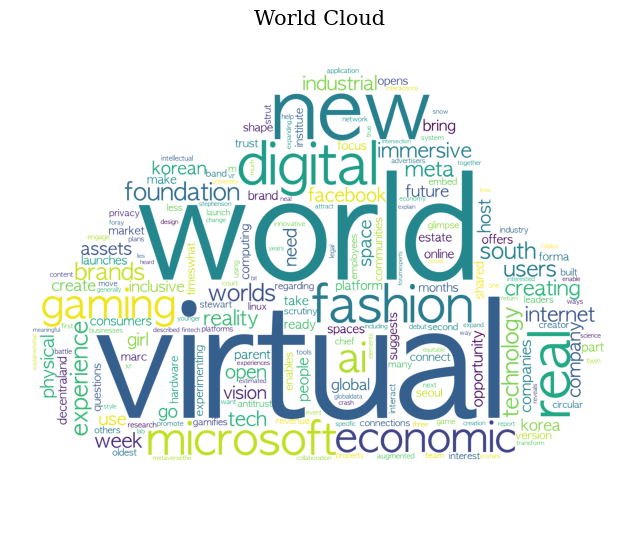

In [9]:
im = Image.open('cloud.png')
mask_arr = np.array(im)

wc = WordCloud(font_path='AppleGothic', width=400, height=400, scale=2.0, max_font_size=250, mask = mask_arr, background_color = 'white')
gen = wc.generate_from_frequencies(freq_dist)
plt.figure(figsize = (8, 8))
plt.imshow(gen)
plt.title("World Cloud", fontsize = 15, fontfamily = 'Serif')
plt.axis('off')